In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, time, glob,warnings, glob
from itertools import product
from scipy.stats import *
from sklearn.mixture import GaussianMixture
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import axes_grid
import re


In [3]:
re.compile(r"test")

re.compile(r'test', re.UNICODE)

In [184]:
result_dbs = np.array(glob.glob('./Anomaliesv2.0_CIplot/*'))
root = './Anomaliesv2.0_CIplot/'
namedb = np.array(['baseline_v2.0_10yrs',
                  'noroll_v2.0_10yrs',
                  'rolling_ns2_rw0.5_v2.0_10yrs',
                  'vary_gp_gpfrac0.10_v2.0_10yrs'])

mafs = {k:{} for k in namedb}

for metric in ['CI_dist','CI_dens']:
    # unsafe indexing - cannot ensure that the dictionary holds the right db
    r = re.compile(metric)
    metricslist = list(filter(r.search, result_dbs)) # Read Note below
    for ndb in namedb:
        r = re.compile(ndb)
        newlist = list(filter(r.search, metricslist)) # Read Note below
        assert len(newlist) == 1, "something went wrong getting the dbs"
        dbfile = newlist[0]
        dump = np.load(dbfile)
        dump.allow_pickle = True
        m = dump['metricValues'][dump['mask']==False]
        mafs[ndb][metric] = m
        print(metric, ndb, dbfile.replace('./Anomaliesv2.0_CIplot/_sims_maf_fbs_',''))

CI_dist baseline_v2.0_10yrs 2_0_baseline_baseline_v2_0_10yrs_db_CI_dist_proposalID_1_and_note_not_like_DD_and_nightgt_0_and_nightlt730_USER.npz
CI_dist noroll_v2.0_10yrs 2_0_noroll_noroll_v2_0_10yrs_db_CI_dist_proposalID_1_and_note_not_like_DD_and_nightgt_0_and_nightlt730_USER.npz
CI_dist rolling_ns2_rw0.5_v2.0_10yrs 2_0_rolling_rolling_ns2_rw0_5_v2_0_10yrs_db_CI_dist_proposalID_1_and_note_not_like_DD_and_nightgt_0_and_nightlt730_USER.npz
CI_dist vary_gp_gpfrac0.10_v2.0_10yrs 2_0_vary_gp_vary_gp_gpfrac0_10_v2_0_10yrs_db_CI_dist_proposalID_1_and_note_not_like_DD_and_nightgt_0_and_nightlt730_USER.npz
CI_dens baseline_v2.0_10yrs 2_0_baseline_baseline_v2_0_10yrs_db_CI_dens_proposalID_1_and_note_not_like_DD_and_nightgt_0_and_nightlt730_USER.npz
CI_dens noroll_v2.0_10yrs 2_0_noroll_noroll_v2_0_10yrs_db_CI_dens_proposalID_1_and_note_not_like_DD_and_nightgt_0_and_nightlt730_USER.npz
CI_dens rolling_ns2_rw0.5_v2.0_10yrs 2_0_rolling_rolling_ns2_rw0_5_v2_0_10yrs_db_CI_dens_proposalID_1_and_note_n

In [187]:
# dont need to define this
# dataout_dist = {}
#, {}, {}, {}
all_metrics = {'dens' : {},
               'dist' : {}}

for key in namedb:
    dataout_dist = mafs[key]['CI_dist'][0]
    dataout_dens = mafs[key]['CI_dens'][0]
    all_metrics['dens'][key] = {}
    all_metrics['dist'][key] = {}
    for m in ['CI','Hg','gr','alpha','err']:

        all_metrics['dens'][key][m] = {}
        all_metrics['dist'][key][m] = {}
        for mag in dataout.keys():
            all_metrics['dist'][key][m][mag] = np.hstack(np.array(dataout_dist[mag][m])
                                               [np.isfinite(np.array(dataout_dist[mag][m]))])
        
            all_metrics['dens'][key][m][mag] = np.hstack(np.array(dataout_dens[mag][m])
                                               [np.isfinite(np.array(dataout_dens[mag][m]))])
        

dist baseline_v2.0_10yrs 0
dist noroll_v2.0_10yrs 0
dist rolling_ns2_rw0.5_v2.0_10yrs 0
dist vary_gp_gpfrac0.10_v2.0_10yrs 0
dens baseline_v2.0_10yrs 1
dens noroll_v2.0_10yrs 1
dens rolling_ns2_rw0.5_v2.0_10yrs 1
dens vary_gp_gpfrac0.10_v2.0_10yrs 1
dist baseline_v2.0_10yrs 1
dist noroll_v2.0_10yrs 1
dist rolling_ns2_rw0.5_v2.0_10yrs 1
dist vary_gp_gpfrac0.10_v2.0_10yrs 1
dens baseline_v2.0_10yrs 2
dens noroll_v2.0_10yrs 2
dens rolling_ns2_rw0.5_v2.0_10yrs 2
dens vary_gp_gpfrac0.10_v2.0_10yrs 2
dist baseline_v2.0_10yrs 2
dist noroll_v2.0_10yrs 2
dist rolling_ns2_rw0.5_v2.0_10yrs 2
dist vary_gp_gpfrac0.10_v2.0_10yrs 2
dens baseline_v2.0_10yrs 3
dens noroll_v2.0_10yrs 3
dens rolling_ns2_rw0.5_v2.0_10yrs 3
dens vary_gp_gpfrac0.10_v2.0_10yrs 3
dist baseline_v2.0_10yrs 3
dist noroll_v2.0_10yrs 3
dist rolling_ns2_rw0.5_v2.0_10yrs 3
dist vary_gp_gpfrac0.10_v2.0_10yrs 3


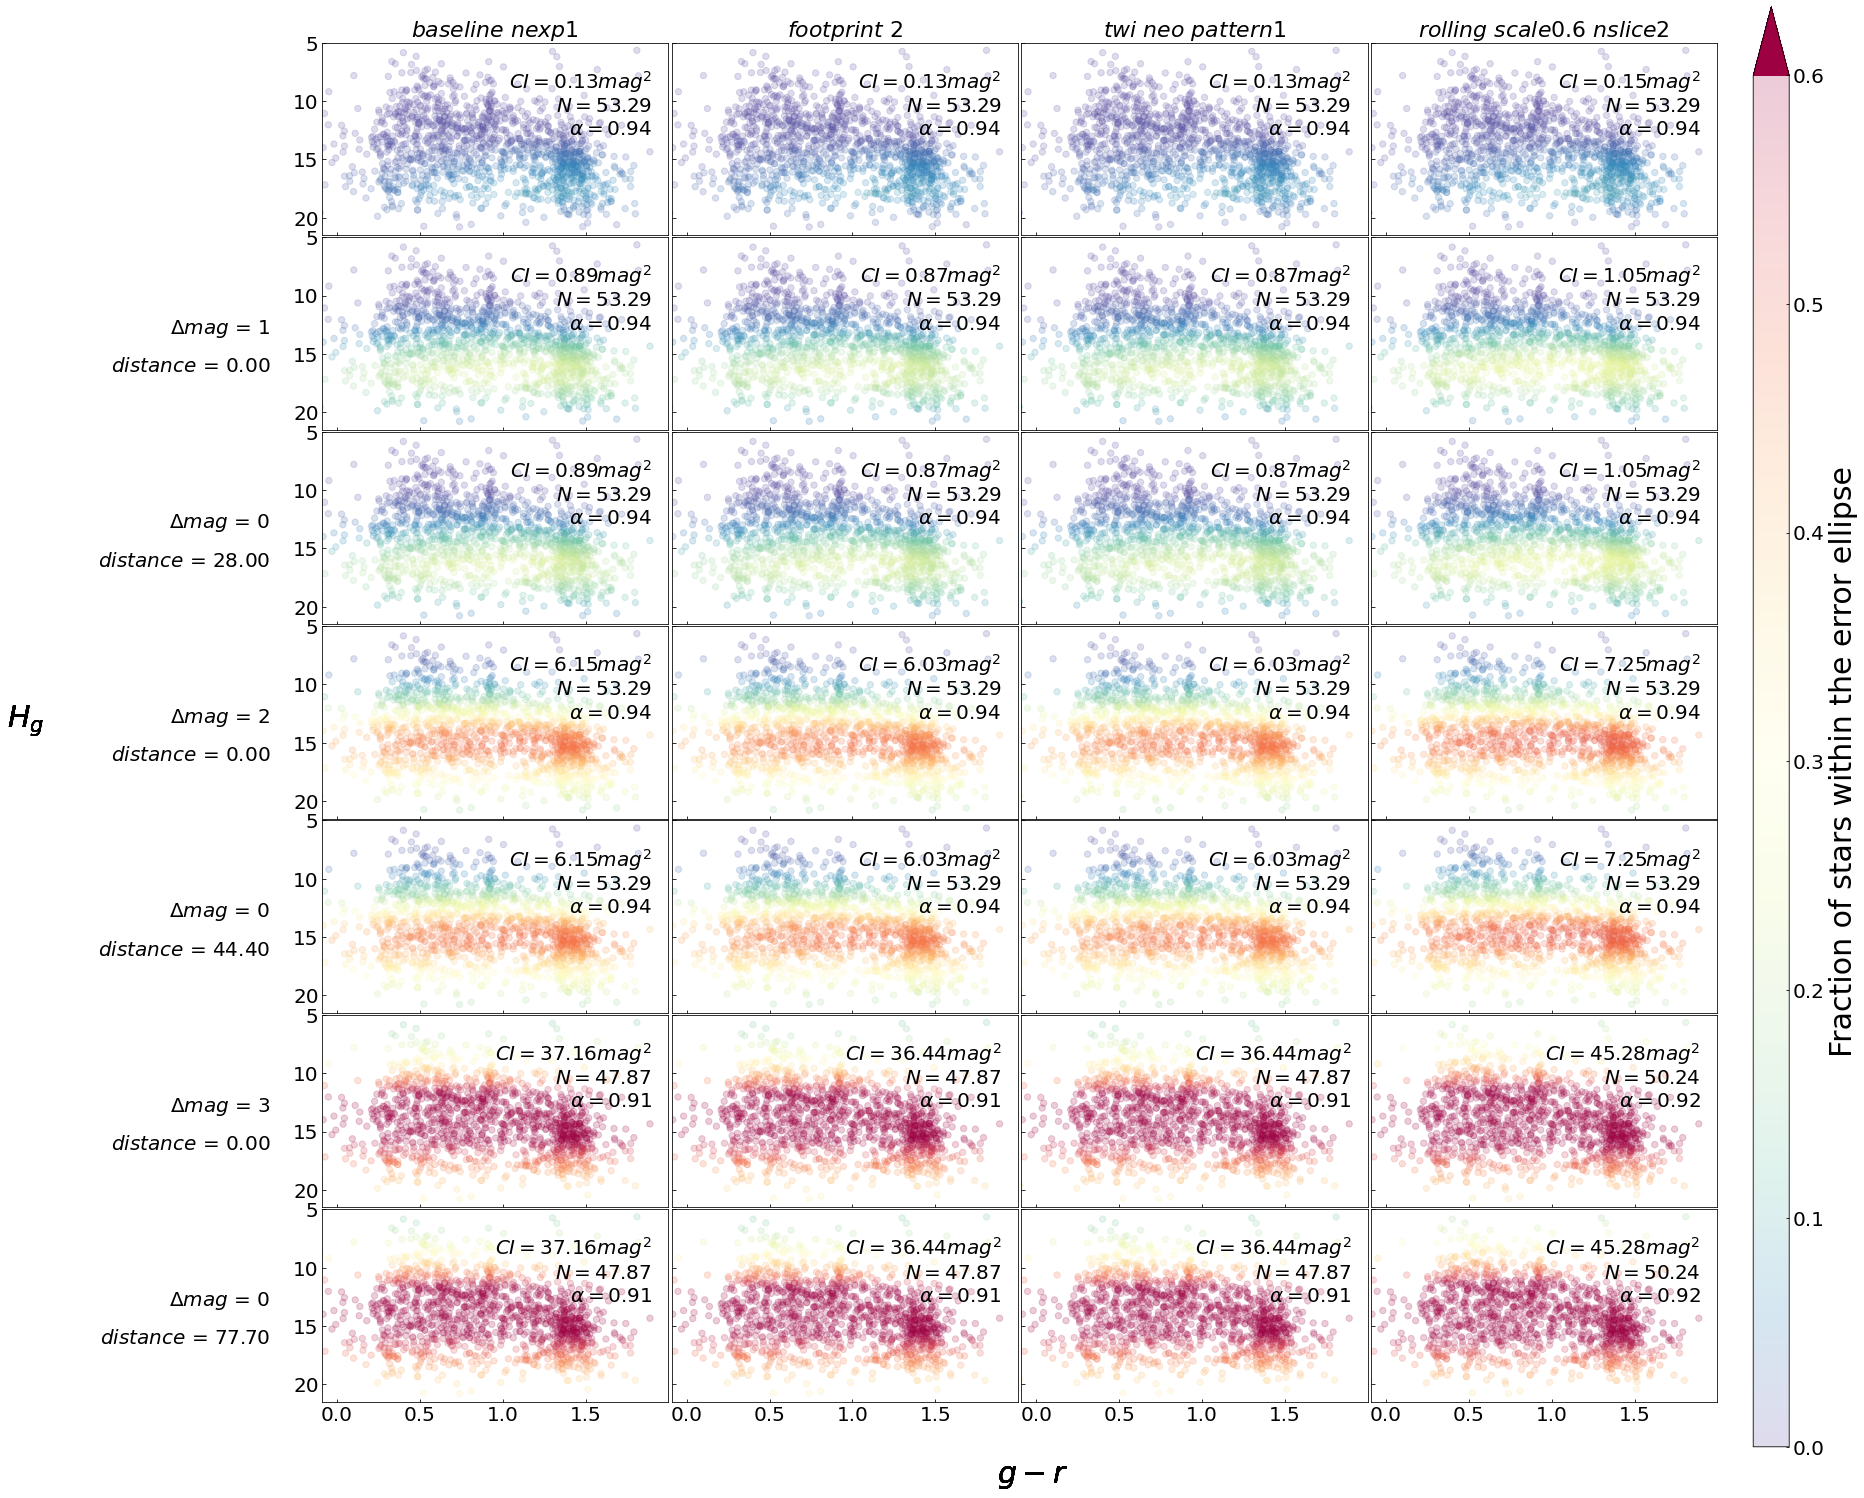

In [188]:
latexname= [r'$baseline\_nexp1$',
            r'$footprint\_2$',
            r'$twi\_neo\_pattern1$',
            r'$rolling\_scale0.6\_nslice2$']

dists = [0, 0, 28, 0, 44.4, 0, 77.7]
mags = [0, 1, 1, 2, 2, 3, 3]

plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)

nrows, ncols = 7, 4
xmin, xmax = -0.09, 1.999 
ymin, ymax = 5, 21.5
vmin, vmax = 0, 0.6
xticks = np.arange(0, xmax-0.01, 0.5)
yticks = np.arange(ymin, ymax-0.01, 5)

# making the figure
f = plt.figure(figsize=(25, 25))
gs = plt.GridSpec(7, 4, figure=f, wspace=0.01, hspace=0.01)

for row in range(7): #rows
    mode = 'dist'
    if (row) % 2:
        mode = 'dens'
    mag = mags[row]  
    
    for col, key in enumerate(namedb): #columns
        ax = f.add_subplot(gs[row, col])
        print(mode, key, mag)
        #extract data
        zero_mask = np.where(all_metrics[mode][key]['gr'][mag]==0)
        non_zero_mask = np.where(all_metrics[mode][key]['gr'][mag]!=0)
        gplot = np.dstack([all_metrics[mode][key]['Hg'][mag],
                     all_metrics[mode][key]['gr'][mag]])
    
        gm = GaussianMixture(n_components=2, random_state=0).fit(gplot[0])
        N = gm.weights_[0] * 100

        #make the plot    
        im = ax.scatter(x=all_metrics[mode][key]['gr'][mag][non_zero_mask],
                    y=all_metrics[mode][key]['Hg'][mag][non_zero_mask],
                    c=all_metrics[mode][key]['CI'][mag][non_zero_mask],
                
                       cmap='Spectral_r',s=40,vmin=vmin,vmax=0.6,alpha=0.2)
            
        # y axis
        ax.set_ylim([ymin,ymax])
        if col > 0:
            ax.set_yticks(yticks, [""]*len(yticks))
        else:
            ax.set_yticks(yticks)
        ax.invert_yaxis()

        #x axis
        ax.set_xlim([xmin,xmax])
        
        if row < 6:
            ax.set_xticks(xticks, [""]*len(xticks))
        else:
            ax.set_xticks(xticks)
        
        #labels
        ax.annotate(r'$CI = {:.2f} mag^2$'.format(
                    np.median(err_ell_dens[key][mag])), 
                    [1.9,8.9], size=20, ha='right')
        ax.annotate(r'$N={:.2f}$'.format(N), 
                    [1.9,10.9], size=20, ha='right')
        ax.annotate(r'$\alpha={:.2f}$'.format(
                        all_metrics[mode][key]['alpha'][mag][0]),
                        [1.9,12.9], size=20, ha='right')
            #ax.annotate(r'$\Delta m={} mag,$'.format(mag),[0.05,6.9], size=20)
        
        if row==0:
            ax.set_title(f'{latexname[col].replace("_"," ")}', size=22)

        if row > 0 and col == 0:
            
            ax.text(-0.15, 0.5, 
                   r"$\Delta mag$ = {}".format(mag if row%2 else 0), size=20,
                  transform=ax.transAxes, ha='right')
            ax.text(-0.15, 0.5 - 0.2, 
                   r"$distance$ = {:.2f}".format(dists[row]), size=20,
                  transform=ax.transAxes, ha='right')
            
            
    f.text(-0.05, 0.5, r"$H_g$", size=30)
    f.text(0.5, .08, r"$g-r$", size=30)
plt.subplots_adjust(wspace=0.07, hspace=0.01)
cb_ax = f.add_axes([0.92, 0.1, 0.02, 0.8])
cbar = f.colorbar(im, cax=cb_ax, extend='max')
cbar.ax.set_ylabel('Fraction of stars within the error ellipse', size=30)
f.savefig("ConfunsionIndex_v2.0.pdf")


In [192]:
(dataout_dist[mag][m] - dataout_dens[mag][m]).sum()

0.0

In [190]:
dataout_dens[mag][m]

array([1.28529117e-02, 2.58368439e-01, 2.71344475e+00, ...,
       3.71937886e-02, 1.31256736e+02, 6.62094491e+02])

In [217]:
db1 = "./Anomaliesv2.0_CIplot/_sims_maf_fbs_2_0_baseline_baseline_v2_0_10yrs_db_CI_dist_proposalID_1_and_note_not_like_DD_and_nightgt_0_and_nightlt730_USER.npz"
db2 = "./Anomaliesv2.0_CIplot/_sims_maf_fbs_2_0_baseline_baseline_v2_0_10yrs_db_CI_dens_proposalID_1_and_note_not_like_DD_and_nightgt_0_and_nightlt730_USER.npz"
dump1 = np.load(db1)
dump1.allow_pickle = True
dump2 = np.load(db2)
dump2.allow_pickle = True
for k in dump1['metricValues'][dump1['mask']==False][0][0].keys():
     print(np.array(dump1['metricValues'][dump1['mask']==False][0][0][k] - 
                    dump2['metricValues'][dump2['mask']==False][0][0][k]).sum())
        
        

0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [199]:
dump1



TypeError: unsupported operand type(s) for -: 'NpzFile' and 'NpzFile'

In [196]:
!ls ./Anomaliesv2.0_CIplot/

_sims_maf_fbs_2_0_baseline_baseline_v2_0_10yrs_db_CI_dens_proposalID_1_and_note_not_like_DD_and_nightgt_0_and_nightlt730_USER.npz
_sims_maf_fbs_2_0_baseline_baseline_v2_0_10yrs_db_CI_dist_proposalID_1_and_note_not_like_DD_and_nightgt_0_and_nightlt730_USER.npz
_sims_maf_fbs_2_0_noroll_noroll_v2_0_10yrs_db_CI_dens_proposalID_1_and_note_not_like_DD_and_nightgt_0_and_nightlt730_USER.npz
_sims_maf_fbs_2_0_noroll_noroll_v2_0_10yrs_db_CI_dist_proposalID_1_and_note_not_like_DD_and_nightgt_0_and_nightlt730_USER.npz
_sims_maf_fbs_2_0_rolling_rolling_ns2_rw0_5_v2_0_10yrs_db_CI_dens_proposalID_1_and_note_not_like_DD_and_nightgt_0_and_nightlt730_USER.npz
_sims_maf_fbs_2_0_rolling_rolling_ns2_rw0_5_v2_0_10yrs_db_CI_dist_proposalID_1_and_note_not_like_DD_and_nightgt_0_and_nightlt730_USER.npz
_sims_maf_fbs_2_0_vary_gp_vary_gp_gpfrac0_10_v2_0_10yrs_db_CI_dens_proposalID_1_and_note_not_like_DD_and_nightgt_0_and_nightlt730_USER.npz
_sims_maf_fbs_2_0_vary_gp_vary_gp_gpfrac0_10_v2_0_10yrs_db_CI_dist_propos